In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal



/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define parameter ranges and step sizes
tau_range = np.linspace(0.5, 10, 100)    # Range of tau values
omega_range = np.linspace(0, 50, 100)  # Range of omega values
zeta_range = np.linspace(0.5, 1.5, 100)   # Range of zeta values

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1  # Exploration factor

# Initialize Q-table
Q_table = np.zeros((len(tau_range), len(omega_range), len(zeta_range)))

print(Q_table)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [3]:
def reward_function(tau, omega, zeta):
    # Define the transfer function with given tau, omega, and zeta
    system = signal.TransferFunction([omega**2], [1, 2*zeta*omega, omega**2])

    # print(system)
    
    # Generate step response
    t, response = signal.step(system)
    # print(t)
    # print(response)
    
    # Calculate performance metrics
    overshoot = np.max(response) - 1  # Overshoot from steady state (1)
    settling_time = t[np.where(np.abs(response - 1) < 0.02)[0][-1]] if len(np.where(np.abs(response - 1) < 0.02)[0]) > 0 else np.inf
    rise_time = t[np.where(response >= 0.9)[0][0]] if len(np.where(response >= 0.9)[0]) > 0 else np.inf
    
    # Reward based on minimizing overshoot and settling time
    reward = - (overshoot**2 + settling_time + rise_time)
    return reward

reward_data = []


In [4]:

for episode in range(100):
    # Select random initial parameters (tau, omega, zeta) as starting state
    tau_idx = np.random.randint(len(tau_range))
    omega_idx = np.random.randint(len(omega_range))
    zeta_idx = np.random.randint(len(zeta_range))
    
    for step in range(50):  # Run for a fixed number of steps per episode
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            # Exploration: choose a random action
            tau_action = np.random.randint(len(tau_range))
            omega_action = np.random.randint(len(omega_range))
            zeta_action = np.random.randint(len(zeta_range))
        else:
            # Exploitation: choose action with highest Q-value
            tau_action, omega_action, zeta_action = np.unravel_index(
                np.argmax(Q_table), Q_table.shape
            )


        # Get the new parameter values
        tau = tau_range[tau_action]
        omega = omega_range[omega_action]
        zeta = zeta_range[zeta_action]
        
        # Calculate reward
        reward = reward_function(tau, omega, zeta)
        reward_data.append(round(reward, 4))

        print("reward: ", round(reward,4))
        
        # Update Q-value using Q-learning update rule
        best_future_q = np.max(Q_table[tau_action, omega_action, zeta_action])
        Q_table[tau_idx, omega_idx, zeta_idx] = (1 - learning_rate) * Q_table[tau_idx, omega_idx, zeta_idx] + \
                                                learning_rate * (reward + discount_factor * best_future_q)
        
        # Transition to the new state
        tau_idx, omega_idx, zeta_idx = tau_action, omega_action, zeta_action



/usr/lib/python3/dist-packages/scipy/signal/_filter_design.py:1709: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -0.5513
reward:  -inf
reward:  -0.3412
reward:  -inf
reward:  -inf
reward:  -0.4074
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -0.5058
reward:  -0.2337
reward:  -inf
reward:  -0.3021
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
reward:  -inf
re

Optimal values found:
 Tau: 0.5
 Omega: 11.616161616161618
 Zeta: 1.0151515151515151


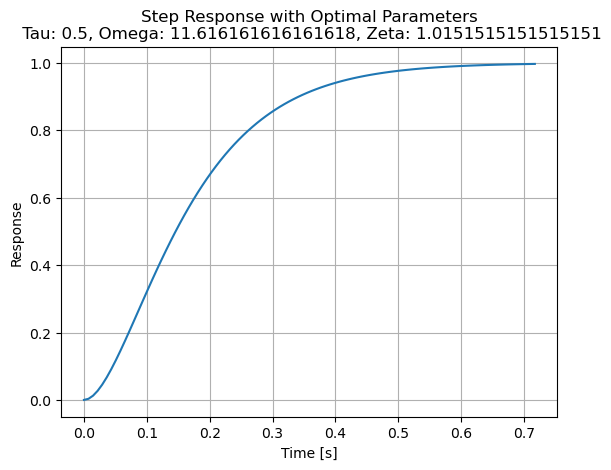

In [5]:
# Find optimal tau, omega, zeta based on the trained Q-table
optimal_tau_idx, optimal_omega_idx, optimal_zeta_idx = np.unravel_index(np.argmax(Q_table), Q_table.shape)
optimal_tau = tau_range[optimal_tau_idx]
optimal_omega = omega_range[optimal_omega_idx]
optimal_zeta = zeta_range[optimal_zeta_idx]

print(f"Optimal values found:\n Tau: {optimal_tau}\n Omega: {optimal_omega}\n Zeta: {optimal_zeta}")

# Plot the step response of the optimal parameters
system = signal.TransferFunction([optimal_omega**2], [1, 2*optimal_zeta*optimal_omega, optimal_omega**2])
t, response = signal.step(system)
plt.plot(t, response)
plt.title(f"Step Response with Optimal Parameters\n Tau: {optimal_tau}, Omega: {optimal_omega}, Zeta: {optimal_zeta}")
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.grid(True)
plt.show()


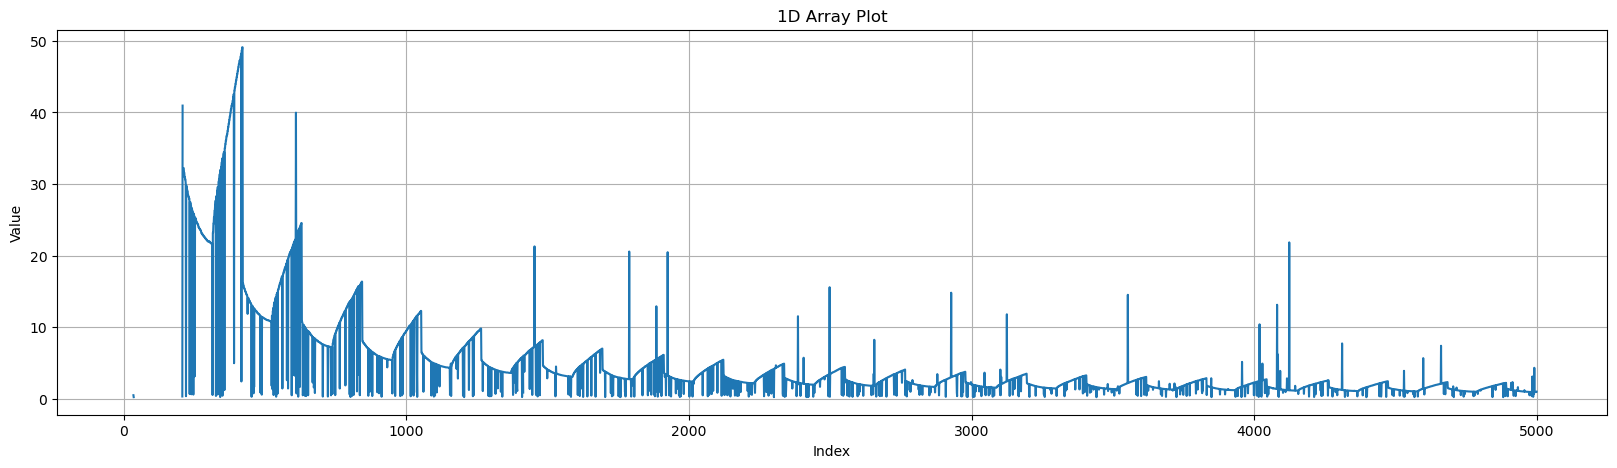

In [7]:
import numpy as np
import matplotlib.pyplot as plt

array = np.abs(np.array(reward_data))

# Plotting the array
plt.figure(figsize=(20, 5))  # Width is 10 inches, height is 5 inches

plt.plot(array)
plt.title("1D Array Plot")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()